**Description**
    
    Example of using functions from external libraries with `pflacs.`

**References**

1. ``seawater`` module, functions for physical properties of sea water, author: Bjørn Ådlandsvik, https://github.com/bjornaa/seawater 
1. ``wall`` module, subsea pipeline wall thickness design to PD 8010-2, author: Ben Randerson, https://github.com/benranderson/wall
1. ``numpy.interp`` function for 1-d linear interpolation https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html

In [1]:
from pflacs import Premise
import seawater
import wall
import numpy

In [2]:
extlib = Premise("External libraries test")
extlib.add_param("water_depth", 10, "water depth (m)")
extlib.add_param("rho_seawater", 1025, "assumed water density (kg/m3)");

In [3]:
help(seawater.dens)

Help on function dens in module seawater.density:

dens(S, T, P=0)
    Compute density of seawater from salinity, temperature, and pressure
    
    Usage: dens(S, T, [P])
    
    Input:
        S = Salinity,     [PSS-78]
        T = Temperature,  [�C]
        P = Pressure,     [dbar = 10**4 Pa]
    P is optional, with default value zero
    
    Output:
        Density,          [kg/m**3]
    
    Algorithm: UNESCO 1983



In [4]:
extlib.add_param("lat", 53.2, "geographical latitude")
extlib.add_param("S", 35, "water salinity")
extlib.add_param("T", 8, "water temperature (°C)");

In [5]:
extlib.plugin_func(seawater.dens)
print(extlib.dens)

In [6]:
extlib.dens is seawater.dens

False

In [7]:
help(extlib.dens)

Help on PflacsFunc in module seawater.density:

dens(S, T, P=0)
    Compute density of seawater from salinity, temperature, and pressure
    
    Usage: dens(S, T, [P])
    
    Input:
        S = Salinity,     [PSS-78]
        T = Temperature,  [�C]
        P = Pressure,     [dbar = 10**4 Pa]
    P is optional, with default value zero
    
    Output:
        Density,          [kg/m**3]
    
    Algorithm: UNESCO 1983



In [8]:
extlib.add_param("rho_seawater_check", desc="calculated water density (kg/m3)")
extlib.rho_seawater_check = extlib.dens()
print(f'{extlib.get_param_desc("rho_seawater_check")} = {extlib.rho_seawater_check}')

calculated water density (kg/m3) = 1027.2741886990423


In [9]:
if extlib.rho_seawater != extlib.rho_seawater_check:
    print(f"Warning: calculated seawater density {extlib.rho_seawater_check} \
    not equal to assumed value {extlib.rho_seawater}.")

In [10]:
extlib.add_param("salinities", desc="water salinity range")
extlib.add_param("densities", desc="water density range")
extlib.salinities = numpy.linspace(30, 40, 11)
extlib.densities = extlib.dens(S=extlib.salinities)

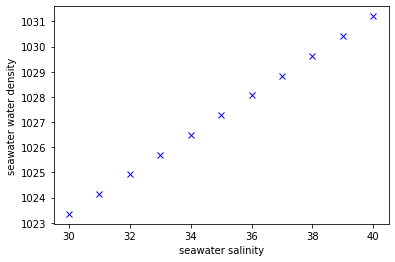

In [11]:
import matplotlib.pyplot as plt
plt.plot(extlib.salinities, extlib.densities, "bx")
plt.xlabel('seawater salinity'); plt.ylabel('seawater water density');

In [12]:
help(wall.pressure_head)

Help on function pressure_head in module wall.wall:

pressure_head(h, rho, g=9.81)
    Calculate the fluid pressure head.
    
    Parameters
    ----------
    h : array : Water depth [m]
    rho : array : Fluid density [kg/m^3]
    g : float : Acceleration of gravitiy [m/s/s]
    
    Returns
    -------
    P_h : array : Pressure head [Pa]



In [13]:
extlib.plugin_func(wall.pressure_head, 
                 argmap={"h":"water_depth", "rho":"rho_seawater"});

In [14]:
extlib.add_param("pressure", desc="pressure (Pa)")
extlib.pressure = extlib.pressure_head()
print(f'«{extlib.name}» pressure = {extlib.pressure}')

«External libraries test» pressure = 100552.5


In [15]:
import pydoc
print(pydoc.render_doc(numpy.interp)[:800])  # print top section of help for numpy.interp
#print(numpy.interp.__doc__[:800])

Python Library Documentation: function interp in module numpy

iinntteerrpp(x, xp, fp, left=None, right=None, period=None)
    One-dimensional linear interpolation.
    
    Returns the one-dimensional piecewise linear interpolant to a function
    with given discrete data points (`xp`, `fp`), evaluated at `x`.
    
    Parameters
    ----------
    x : array_like
        The x-coordinates at which to evaluate the interpolated values.
    
    xp : 1-D sequence of floats
        The x-coordinates of the data points, must be increasing if argument
        `period` is not specified. Otherwise, `xp` is internally sorted after
        normalizing the periodic boundaries with ``xp = xp % period``.
    
    fp : 1-D sequence of float or complex
        The y-coordinates of the data points,


In [16]:
extlib.plugin_func(numpy.interp, 
            argmap={"x":"S", "xp":"salinities", "fp":"densities"}, 
            newname="interp_water_density");

In [17]:
rho_interp = extlib.interp_water_density()
print(f"Interpolated water density = {rho_interp}, for salinity = {extlib.S} ")

Interpolated water density = 1027.2741886990423, for salinity = 35 


In [18]:
rho_interp = extlib.interp_water_density(S=39.5)
print(f"Interpolated water density = {rho_interp}, for salinity = 39.5 ")

Interpolated water density = 1030.81293808007, for salinity = 39.5 
